# Pymaceuticals Inc.
---

### Analysis

- Mice treated with Capomulin or Ramicane had much smaller ending tumor volumes than those treated with Infubinol or Ceftamin.
- There is a strong positive correlation between mice weight and tumor volume, suggesting that heavier mice are more likely to have larger tumors.
- There is less variance between values within Capomulin and Ramicane treatment groups as compared to all other treatment and placebo groups, although Capomulin and Ramicane were also observed over greater total timepoints than any other treatment. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = study_df[study_df.duplicated(["Mouse ID","Timepoint"],keep=False)]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = study_df.loc[study_df["Mouse ID"]!="g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = clean_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = clean_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_variance = clean_study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_sd = clean_study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = clean_study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({"Mean Tumor Volume": drug_mean, "Median Tumor Volume": drug_median,
                          "Tumor Volume Variance":drug_variance,"Tumor Volume Std. Dev":drug_sd,
                          "Tumor Volume Std. Err.": drug_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_sum = clean_study_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
# Using the aggregation method, produce the same summary statistics in a single line.
agg_sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

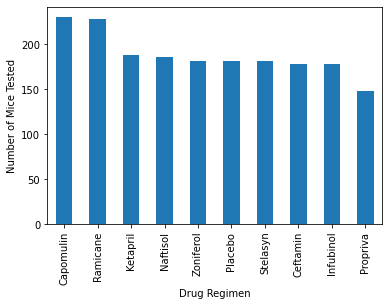

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_df = pd.DataFrame(clean_study_df.groupby("Drug Regimen").count()["Timepoint"])
timepoint_df = timepoint_df.reset_index()
timepoint_df = timepoint_df.sort_values(by="Timepoint",ascending = False)
timepoint_pd_plot = timepoint_df.plot.bar("Drug Regimen","Timepoint",legend=False)
timepoint_pd_plot = timepoint_pd_plot.set_ylabel("Number of Mice Tested")

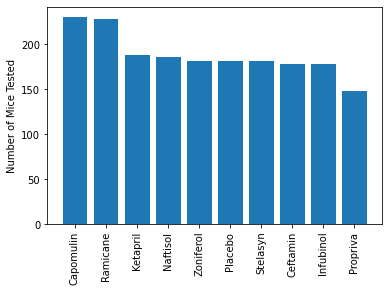

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_plot = plt.bar(timepoint_df["Drug Regimen"],timepoint_df["Timepoint"],align = 'center')
timepoint_plot = plt.xticks(rotation='vertical')
timepoint_plot = plt.ylabel("Number of Mice Tested")

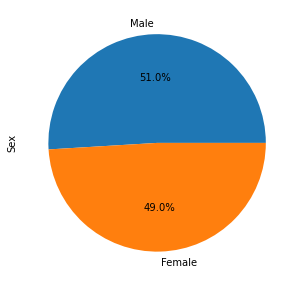

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# As a heads up, this code creates the percentages shown in the checkpoints, however this is statistically incorrect because
# it is weighting the results by the number of datapoints per gender, not the number of unique mice. The true results are
# about .5% higher on females
sex_df = pd.DataFrame(clean_study_df["Sex"].value_counts())

sex_pd_plot = sex_df.plot.pie(y="Sex",figsize=(5,5),autopct='%1.1f%%',legend=False)

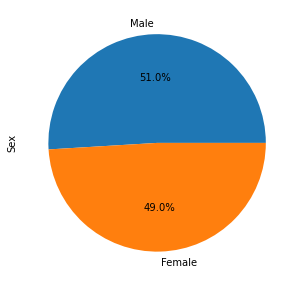

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_plot = plt.figure(figsize=(5,5))
sex_plot = plt.pie(sex_df["Sex"],labels = ["Male","Female"],autopct='%1.1f%%')
sex_plot = plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime_df = pd.DataFrame(clean_study_df.groupby("Mouse ID").max()["Timepoint"])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(clean_study_df, maxtime_df, on=("Mouse ID", "Timepoint"), how="right")
#max_timepoint_df

chosen_treatments = max_timepoint_df.loc[(max_timepoint_df["Drug Regimen"] == "Capomulin") |  
                                         (max_timepoint_df["Drug Regimen"] == "Ramicane") | 
                                         (max_timepoint_df["Drug Regimen"] == "Infubinol") |
                                        ( max_timepoint_df["Drug Regimen"] ==  "Ceftamin")]
chosen_treatments

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
234,a644,45,32.978522,1,Ramicane,Female,7,17
240,i177,45,33.562402,3,Ramicane,Male,10,18
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# I could not figure out a smooth way to handle a single list with all treatments listed, yet able to be separated later. 

# Locate the rows which contain mice on each drug and get the tumor volumes 
capomulin_vol = chosen_treatments.loc[chosen_treatments["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane_vol = chosen_treatments.loc[chosen_treatments["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol_vol = chosen_treatments.loc[chosen_treatments["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin_vol = chosen_treatments.loc[chosen_treatments["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
tumor_vol = chosen_treatments.loc[:,"Tumor Volume (mm3)"]  


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Overall Quartiles
overall_quartiles = tumor_vol.quantile([.25,.5,.75])
overall_lowq = overall_quartiles[.25]
overall_upq = overall_quartiles[.75]
overall_iqr = overall_upq - overall_lowq
overall_lowbound = overall_lowq - (1.5*overall_iqr)
overall_upbound = overall_upq + (1.5*overall_iqr)
overall_outliers = tumor_vol.loc[(tumor_vol < overall_lowbound) | 
                                 (tumor_vol > overall_upbound)]

In [16]:
#Capomulin Quartiles
cap_quartiles = capomulin_vol.quantile([.25,.5,.75])
cap_lowq = cap_quartiles[.25]
cap_upq = cap_quartiles[.75]
cap_iqr = cap_upq - cap_lowq
cap_lowbound = cap_lowq - (1.5*cap_iqr)
cap_upbound = cap_upq + (1.5*cap_iqr)
capomulin_vol = pd.Series(capomulin_vol)
cap_outliers = capomulin_vol.loc[(capomulin_vol < cap_lowbound)|
                                 (capomulin_vol > cap_upbound)]

In [17]:
# Ramicane Quartiles
ram_quartiles = ramicane_vol.quantile([.25,.5,.75])
ram_lowq = ram_quartiles[.25]
ram_upq = ram_quartiles[.75]
ram_iqr = ram_upq - ram_lowq
ram_lowbound = ram_lowq - (1.5*ram_iqr)
ram_upbound = ram_upq + (1.5*ram_iqr)
ram_outliers = ramicane_vol.loc[(ramicane_vol < ram_lowbound)|
                                (ramicane_vol > ram_upbound)]

In [18]:
# Infubinol Quartiles
inf_quartiles = infubinol_vol.quantile([.25,.5,.75])
inf_lowq = inf_quartiles[.25]
inf_upq = inf_quartiles[.75]
inf_iqr = inf_upq - inf_lowq
inf_lowbound = inf_lowq - (1.5*inf_iqr)
inf_upbound = inf_upq + (1.5*inf_iqr)
inf_outliers = infubinol_vol.loc[(infubinol_vol < inf_lowbound)|
                                 (infubinol_vol > inf_upbound)]

In [19]:
# Ceftamin Quartiles
cef_quartiles = ceftamin_vol.quantile([.25,.5,.75])
cef_lowq = cef_quartiles[.25]
cef_upq = cef_quartiles[.75]
cef_iqr = cef_upq - cef_lowq
cef_lowbound = cef_lowq - (1.5*cef_iqr)
cef_upbound = cef_upq + (1.5*cef_iqr)
cef_outliers = ceftamin_vol.loc[(ceftamin_vol < cef_lowbound)|
                                 (ceftamin_vol > cef_upbound)]

In [20]:
# Determine outliers using upper and lower bounds
print(f"Capomulin's potential outliers: {cap_outliers}\nRamicane's potential outliers: {ram_outliers}\n\
Infubinol's potential outliers: {inf_outliers}\nCeftamin's potential outliers: {cef_outliers}")    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


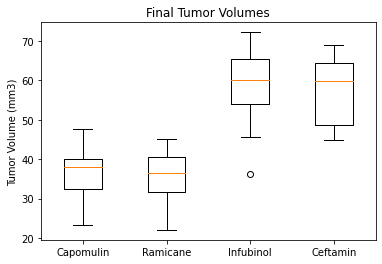

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot([capomulin_vol,ramicane_vol,infubinol_vol,ceftamin_vol])
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

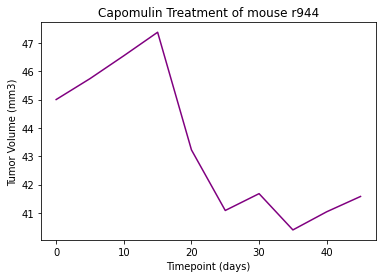

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
r944_df = clean_study_df.loc[clean_study_df["Mouse ID"] == "r944",:]
fig2,ax2 = plt.subplots()
ax2.set_title("Capomulin Treatment of mouse r944")
ax2.set_xlabel("Timepoint (days)")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.plot(r944_df["Timepoint"],r944_df["Tumor Volume (mm3)"],color="purple")
plt.show()

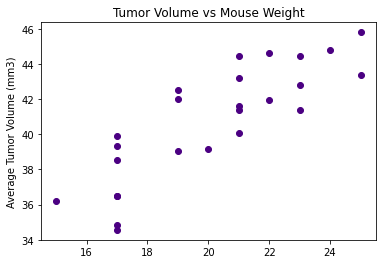

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = pd.DataFrame(clean_study_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])
scatter_df = pd.merge(clean_study_df,scatter_df, on=["Mouse ID"],how="right")
scatter_df = scatter_df.loc[scatter_df["Drug Regimen"] == "Capomulin",:]
del scatter_df["Tumor Volume (mm3)_x"]
scatter_df = scatter_df.drop_duplicates("Mouse ID")
scatter_df
fig3,ax3 = plt.subplots()
ax3.set_title("Tumor Volume vs Mouse Weight")
ax3.set_ylabel("Average Tumor Volume (mm3)")
ax3.scatter(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)_y"],color="indigo")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


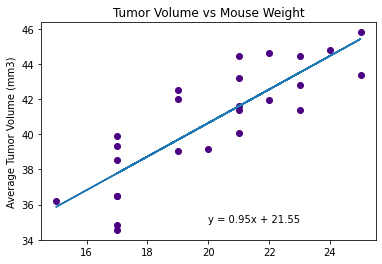

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mw_slope, mw_int, mw_r, mww_p, mw_std_err = st.linregress(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)_y"])
mw_fit = mw_slope * scatter_df["Weight (g)"] + mw_int
print(f"The correlation between mouse weight and the average tumor volume is {round(mw_r,2)}")
fig3,ax3 = plt.subplots()
ax3.set_title("Tumor Volume vs Mouse Weight")
ax3.set_ylabel("Average Tumor Volume (mm3)")
ax3.scatter(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)_y"],color="indigo")
ax3.plot(scatter_df["Weight (g)"],mw_fit)
ax3.annotate((f"y = {str(round(mw_slope,2))}x + {str(round(mw_int,2))}"),(20,35))
plt.show()